In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# read csv file into pandas
df = pd.read_csv("quest3.csv")
df.head(20)

,questio_id,student_answer,score
0,3,سبعة وهي غسل الوجه غسل اليدين الى المرفقين الن...,1.75
1,3,غسل الوجه اليدين الرأس و الكعبين\nسننه التسمية...,2.00
2,3,فرائض: النية،غسل الوجه،غسل اليدين،مسح الرأس،غس...,2.50
3,3,؟,0.00
4,3,فرائض هي غسل اليدين ثلاث مرات و غسل الوجه ثلا...,2.00
5,3,غسل اليدين و الوجه و الرجلين,0.75
6,3,غسل الوجه مسح الرأس و غوجو ساتورو,0.50
7,3,النية غسل الوجه و اليدين و الرجلين الدلك و الفور,1.50
8,3,الفرائض هي النية والدلك والفور غسل الوجه واليد...,1.75
9,3,مستحب,0.00


In [76]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   questio_id      107 non-null    int64  
 1   student_answer  107 non-null    object 
 2   score           107 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.6+ KB


In [77]:
df.groupby('score').size()

score
0.00    10
0.25     6
0.50     2
0.75     2
1.00     8
1.25    12
1.50    26
1.75    17
2.00     5
2.25     6
2.50     7
2.75     3
3.00     1
3.50     2
dtype: int64

In [78]:
df.duplicated().sum()

8

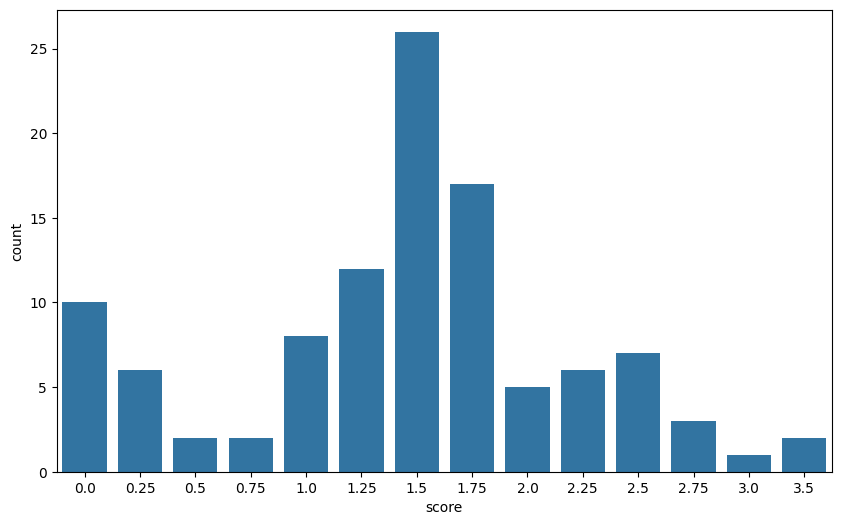

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score')
plt.show()

In [82]:
import pandas as pd
df = pd.read_csv('./quest3.csv')
df1 = pd.DataFrame.drop_duplicates(df)
df2 = pd.DataFrame(df1)
df2['score'] = df2['score'].apply(lambda x : int(x * 5 / 3.5 ))
csv = './question3.csv'
df2.to_csv(csv,index=False)
print(len(df1))

99


In [83]:
df = pd.read_csv("question3.csv")
df.head(20)

,questio_id,student_answer,score
0,3,سبعة وهي غسل الوجه غسل اليدين الى المرفقين الن...,2
1,3,غسل الوجه اليدين الرأس و الكعبين\nسننه التسمية...,2
2,3,فرائض: النية،غسل الوجه،غسل اليدين،مسح الرأس،غس...,3
3,3,؟,0
4,3,فرائض هي غسل اليدين ثلاث مرات و غسل الوجه ثلا...,2
5,3,غسل اليدين و الوجه و الرجلين,1
6,3,غسل الوجه مسح الرأس و غوجو ساتورو,0
7,3,النية غسل الوجه و اليدين و الرجلين الدلك و الفور,2
8,3,الفرائض هي النية والدلك والفور غسل الوجه واليد...,2
9,3,مستحب,0


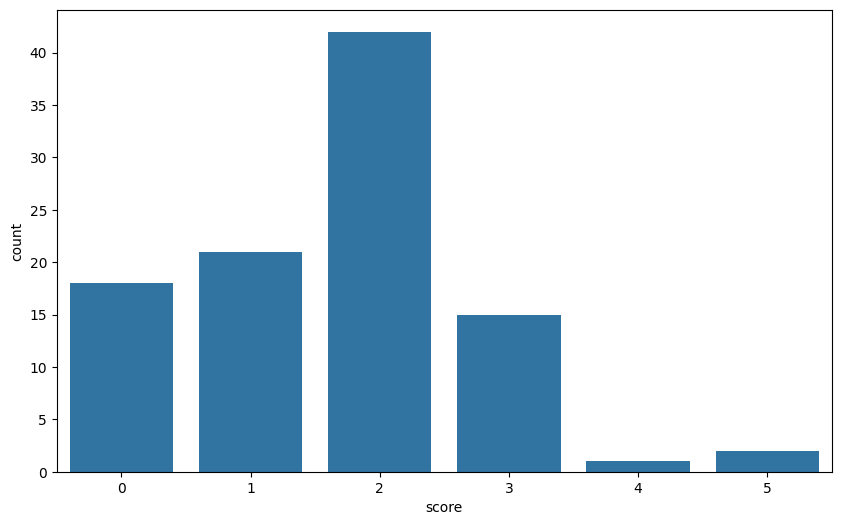

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score')
plt.show()

In [85]:
def txt_preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return tokens

In [86]:
import nltk
from nltk.tokenize import word_tokenize

In [87]:
df['tokens'] = df['student_answer'].apply(txt_preprocess)

In [88]:
from gensim.models import Word2Vec

In [89]:
model_word2vec = Word2Vec(df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [90]:
def get_word_vector(tokens, model_word2vec):
    textvector = np.zeros((100,), dtype='float32')
    for token in tokens:
        try:
            textvector += model_word2vec.wv[token]
        except KeyError:
            continue
    return textvector


df['textvector'] = df['tokens'].apply(lambda x: get_word_vector(x, model_word2vec))

In [91]:
df.head(5)

,questio_id,student_answer,score,tokens,textvector
0,3,سبعة وهي غسل الوجه غسل اليدين الى المرفقين الن...,2,"[سبعة, وهي, غسل, الوجه, غسل, اليدين, الى, المر...","[-0.019983994, 0.03754149, -0.027058441, -0.00..."
1,3,غسل الوجه اليدين الرأس و الكعبين\nسننه التسمية...,2,"[غسل, الوجه, اليدين, الرأس, و, الكعبين, سننه, ...","[-0.018135969, 0.027046405, 0.010358574, 0.029..."
2,3,فرائض: النية،غسل الوجه،غسل اليدين،مسح الرأس،غس...,3,"[فرائض, :, النية،غسل, الوجه،غسل, اليدين،مسح, ا...","[-0.022664402, 0.002174329, 0.027014023, 0.025..."
3,3,؟,0,[؟],"[-0.007640964, 0.0069850897, 0.006604949, -0.0..."
4,3,فرائض هي غسل اليدين ثلاث مرات و غسل الوجه ثلا...,2,"[فرائض, هي, غسل, اليدين, ثلاث, مرات, و, غسل, ا...","[-0.045269635, 0.0362594, -0.045902412, 0.1353..."
